In [1]:
#gọi thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# đọc file csv
path = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data.csv"
df = pd.read_csv(path)

#hàm chuyển đổi 10min -> 1hour
def convert_to_hour(data):
    data['Date'] = pd.to_datetime(data['Date'], dayfirst= 1)
    data[['Power','Speed','Direction']] = data[['Power','Speed','Direction']].apply(pd.to_numeric, errors = 'coerce')
    z = pd.DataFrame(columns = ['Date','Power','Speed','Direction'],index = range(len(df)//6))
    for i in range(len(data)//6):
        dict = data[i*6:i*6+6]
        mean = dict.mean() # coi cái mean này mấy trường hợp mà NaN thì nó xử lý thể nào để đưa vào
        z.Date[i] = data.Date[i*6]
        z.Power[i] = mean.Power
        z.Speed[i] = mean.Speed
        z.Direction[i] = mean.Direction
    z.set_index('Date')
    return z
convert_to_hour(df)

#xuất thành new file csv 1hour resolution
df_new=convert_to_hour(df)
path_new = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_convert_to_hour.csv"
df_new.to_csv(path_new,index=0)

C:\Users\PHUNGH~1\AppData\Local\Temp/ipykernel_2168/3366701813.py:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = dict.mean() # coi cái mean này mấy trường hợp mà NaN thì nó xử lý thể nào để đưa vào
C:\Users\PHUNGH~1\AppData\Local\Temp/ipykernel_2168/3366701813.py:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = dict.mean() # coi cái mean này mấy trường hợp mà NaN thì nó xử lý thể nào để đưa vào


In [2]:
path = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_convert_to_hour.csv"
df = pd.read_csv(path)

for i,v in enumerate(df['Power']):
    if v<0:
        df['Power'].iloc[i]=np.nan
    else:
        pass

df['Power']=df['Power'].interpolate()
df=df.dropna()
df

c:\Users\Phung Ha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Power,Speed,Direction
0,2020-01-01 00:00:00,1994.357434,14.338403,24.464274
1,2020-01-01 01:00:00,1984.154051,14.262861,22.121012
2,2020-01-01 02:00:00,1998.952861,14.864387,19.693532
3,2020-01-01 03:00:00,1978.209535,14.198794,21.544571
4,2020-01-01 04:00:00,1971.243258,13.556109,19.285413
...,...,...,...,...
8779,2020-12-31 19:00:00,1992.116679,15.283333,12.950000
8780,2020-12-31 20:00:00,1992.366659,14.333333,13.833333
8781,2020-12-31 21:00:00,1993.216695,13.283333,11.333333
8782,2020-12-31 22:00:00,1934.666667,12.733333,10.000000


Text(0, 0.5, 'Power (kW)')

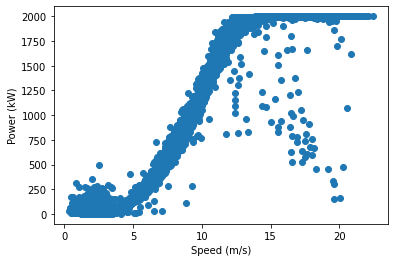

In [3]:
plt.scatter(df.Speed,df.Power)
plt.xlabel('Speed (m/s)')
plt.ylabel('Power (kW)')

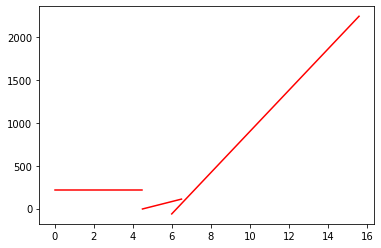

In [4]:
#Function of Reg Line
def visualize(a):
    plt.scatter(a.Speed,a.Power)
    plt.xlabel('Speed (m/s)')
    plt.ylabel('Power (kW)')

def cutting1():
    o = np.array([6,9,11.8,12.8,15.6])
    p = np.array([30,150,1250,1800,1980])
    m1, b1 = np.polyfit(o, p, 1)
    plt.plot(o, (m1+5)*o + b1+50,'r')
    return m1,b1
m1,b1 = cutting1()

def cutting2():
    o = np.array([4.5,5.5,6.5])
    p = np.array([10,125,145])
    m2, b2 = np.polyfit(o, p, 1)
    plt.plot(o, (m2-10)*o + b2+15,'r')
    return m2,b2
m2,b2 = cutting2()

def cutting3():
    o = np.array([0,1,2,3,4.5])
    p = np.array([220,220,220,220,220])
    m3,b3 = np.polyfit(o,p,1)
    plt.plot(o,m3*o+b3,'r')
    return m3,b3
m3,b3 = cutting3()

<Figure size 720x576 with 0 Axes>

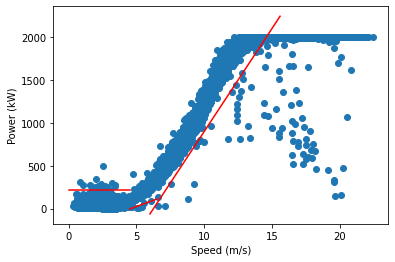

<Figure size 720x576 with 0 Axes>

In [5]:
#Visualization
fig,axes  = plt.subplots()
axes = visualize(df)
axes = cutting1()
axes = cutting2()
axes = cutting3()
plt.figure(figsize=(10,8))

c:\Users\Phung Ha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


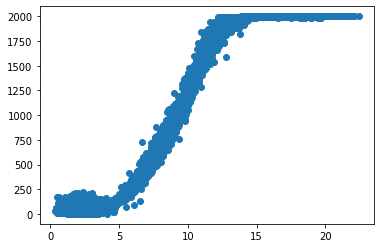

In [6]:
#Cutting Data
for i,v in enumerate(df['Power']):
    if v < ((m1+5)*df['Speed'].iloc[i]+b1+50) and v < 1980:
        df['Power'].iloc[i]=np.nan
    else:
        pass
df = df.dropna()

for i,v in enumerate(df['Power']):
    if v < ((m2-10)*df['Speed'].iloc[i]+b2+15) and v < 225:
        df['Power'].iloc[i]=np.nan
    else:
        pass
df = df.dropna()

for i,v in enumerate(df['Power']):
    if v > (m3*df['Speed'].iloc[i] + b3) and (df['Speed'].iloc[i]<5):
        df['Power'].iloc[i]=np.nan
    else:
        pass
df = df.dropna()

#Visualization
plt.scatter(df.Speed,df.Power)

In [7]:
path_final = "C:/Users/Phung Ha/Desktop/Data_final_file/WT_Data_after_preprocessing.csv"
df = df.reset_index().drop('index',axis=1).set_index('Date')
df.to_csv(path_final,index=1)